# Gaussian_Discriminant_Analysis Using Scikit_learn

#### Importing libraries and Data Visualisation

In this subtask, Scikit Learn based Gaussian Discriminant Analysis model is used to train on 'ds2_train.csv' and then tested on 'ds2_test.csv'.

Numpy is used to create array and its functions are used such as exponential function, dot product, transpose of a matrix etc.

Pandas is used to read data from the csv files and convert it into list of arrays.

Matplotlib is used to draw various plots.

Sklearn is the most common machine learning library with many inbuilt functions

In [28]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

matplotlib inline is used to display plots directly within the notebook interface.

In [29]:
%matplotlib inline

The data from the csv files are extracted by pandas.read_csv function where it reads the data from the csv file and converts it into the dataframe.

In [30]:
# Initialising the traning and test examples
# df_train represents the traning DataFrame

df_train = pd.read_csv('ds2_train.csv')
df_test = pd.read_csv('ds2_test.csv')

In [31]:
# Printing the datframe df_train to see the type of data
# pandas.head(n) function is used to print the first n data entries of the respective dataframe. By default n=5

df_train.head(10)

,x_1,x_2,y
0,3.759481,7.507940,0.0
1,3.422057,4.991203,0.0
2,2.778818,4.112071,0.0
3,4.018066,5.653732,0.0
4,1.806062,4.685966,0.0
5,2.882302,5.123573,0.0
6,3.189999,5.424746,0.0
7,2.104426,2.480323,0.0
8,1.771032,3.059402,0.0
9,3.397404,5.148616,0.0


In [32]:
# It's important to check for the null values in both the training and the test dataset

print(df_train.isnull().sum())
print(df_test.isnull().sum())

x_1    0
x_2    0
y      0
dtype: int64
x_1    0
x_2    0
y      0
dtype: int64


In [33]:
# Printing the data entries of column y to see the types of labels
# pandas.value_counts() function is used to print the number of distinct entries in a particular coulmn

df_train['y'].value_counts()

0.0    400
1.0    400
Name: y, dtype: int64

In [34]:
X_train = df_train[['x_1', 'x_2']].values
y_train = df_train['y'].values

X_test = df_test[['x_1', 'x_2']]
y_test = df_test['y']

From the above few test runs, it is clear our dataset has 3 columns named as 'x_1', 'x_2' and y.
The total number of entries are 800. Column 'y' has only two labels 0 and 1.

#### Data Preprocessing

Let's analyse the data using the scatter plot

plt.scatter() This function is used to create a scatter plot, which is a graphical representation of data points on a two-dimensional plane. Each data point is represented by a dot on the plot, with its position determined by the values of two numeric variables.

Text(0.5, 1.0, 'Original plot of data')

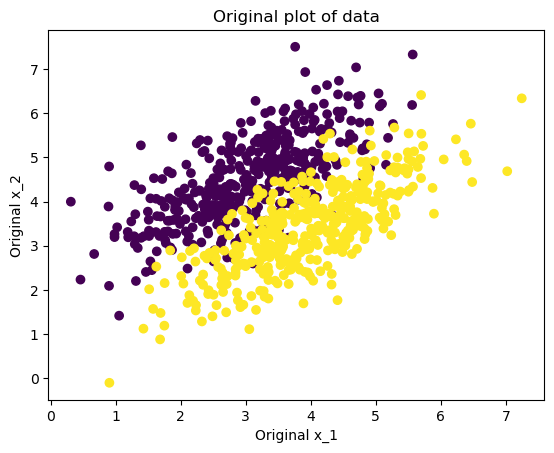

In [35]:
# The data is visualised on the scatter plot by plt.scatter
# plt.xlabel prints the label of the data displayed on tbe x axis
# plt.ylabel prints the label of the data displayed on tbe y axis
# plt.title prints the title of the plot to be displayed at the top

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.xlabel('Original x_1')
plt.ylabel('Original x_2')
plt.title("Original plot of data")

It is clear that there is no noise in this data. So, QuantileTransformer and StandardScaler are not going to give drastic changes

Instead I am using PolynomialFeatures

In this, it takes an input as degree and considers all the features of that degree

By running a few tests, I have concluded degree=25

In [36]:
# PolynomialFeature is used to preprocess the data before training the model
# degree takes the maximum degree till which it has to consider while transforming the data
# .fit_transform() transforms the data and fit it according to the procedure of PolynomialFeatures and with that degree 

X_train_new = PolynomialFeatures(degree=25).fit_transform(X_train) # 7 0.91875
X_test_new =  PolynomialFeatures(degree=25).fit_transform(X_test)  # 9 0.93

After preprocessing the data, the model is defined

In [37]:
# Defining model

model = LinearDiscriminantAnalysis()

### LinearDiscriminantAnalysis has a few hyperparameters

'solver' refers to the method or algorithm used to estimate the parameters of the Gaussian distributions for each class in the dataset. GDA is a generative model that assumes the feature distributions follow multivariate Gaussian distributions. The goal of the solver in GDA is to estimate the mean vectors and covariance matrices for each class based on the training data.

There are three main solvers available in GDA:

1) svd (Singular Value Decomposition): This solver computes the Singular Value Decomposition of the class covariance matrix. It is the default solver in scikit-learn's implementation of GDA. SVD is efficient for high-dimensional datasets and helps in calculating the inverse of the covariance matrix.

2) lsqr (Least Squares Solution): The lsqr solver estimates the covariance matrix using a least squares approach. It is particularly useful when dealing with singular or ill-conditioned covariance matrices.

3) eigen (Eigenvalue Decomposition): The eigen solver calculates the covariance matrix's eigenvalues and eigenvectors. It is well-suited when the number of features is relatively small compared to the number of samples.

### GridSearchCV

GridSearchCV (Grid Search Cross-Validation) is a technique for hyperparameter tuning and model selection in machine learning. It is a systematic way of searching through a predefined set of hyperparameter values to find the combination that yields the best model performance. GridSearchCV is commonly used to optimize the hyperparameters of a machine learning model and improve its generalization on unseen data.

In [38]:
# Defining the parameter to be hypertuned
parameters = {
    'solver': ['svd', 'lsqr']
}

GridSearchCV() takes three parameters 

1) model: It takes the machine learning model as input on which the data is to be trained

2) parameters: It takes the hyperparameters of the above prescribed model that are to be tuned

3) cv: It takes the input for cross-validation. In this, it breaks the data into the n units and then train the data on n-1 units and gets it checked by the nth data. It does it in n steps where every segment of data is tested one time. 

For example, cv=5 it breaks the data into 5 equal parts. Then it trains the data on first 4 parts and gets it tested by the 5th segement of data. Then it trains on 1st, 2nd, 3rd and 5th segements of data and gets it tested on 4th segment of data and so on.

In [39]:
# Defining GridSearchCV by the name grid
# Here the model is LinearDiscriminativeAnalysis 
# parameters to be hypertuned is solver defined above
# cv is defined as 5 means it will break the data into 5 segment and will print each of its acuuracy

grid = GridSearchCV(model, parameters, cv=5)

# .fit() is used to fit the data in the object grid
# X_train_new is the PolynomialFeatures dataset
# y_train is the target label of the training set

grid.fit(X_train_new, y_train)

GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr']})

In [40]:
# .cv_results_ has a unique feature which comes with GridSearchCV
# This prints various information such as the parameters and their respective test scores and so on

# That tabular data is converted into a DataFrame to have a better visualisation of data
cv_score = pd.DataFrame(grid.cv_results_)
cv_score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.129077,0.035768,0.00533,0.006689,svd,{'solver': 'svd'},0.88125,0.91875,0.89375,0.93750,0.90625,0.9075,0.019526,1
1,0.083254,0.004778,0.00000,0.000000,lsqr,{'solver': 'lsqr'},0.71875,0.67500,0.72500,0.73125,0.68750,0.7075,0.022150,2


In [41]:
# Extracting the parameters with best accuracy
# .best_param_ gives the best parameters required for the maximum mean_test_score

grid.best_params_

{'solver': 'svd'}

### Implementing the model

After preprocessing the data and finding the required parameters which would provide the best accuracy, its time to calculate the final accuracy.

In [42]:
# Defining the model
# The parameters are set according to the parameters' values obtained above
# .fit() function is used to fit X_train_new and y_train and train according to it
# X_train_new is the PolynomialFeatures() dataset

model = LinearDiscriminantAnalysis(solver='svd').fit(X_train_new, y_train)

In [43]:
# .predict is used to predict the output based on the above learning
# It predicts the X_train_new datset

model.predict(X_train_new)

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0.

In [44]:
# Accuracy of the predicted output is printed by accuracy_score method

X_train_prediction = model.predict(X_train_new)
train_accuracy = accuracy_score(y_train, X_train_prediction)

In [45]:
# Printing the accuracy on th training set by the above designed model
train_accuracy

0.92

In [46]:
# Accuracy of the predicted output is printed by accuracy_score method

X_test_prediction = model.predict(X_test_new)
test_accuracy = accuracy_score(y_test, X_test_prediction)

In [55]:
# Printing the accuracy on th training set by the above designed model
test_accuracy

0.91

Predicting the test data

In [56]:
# Accuracy of the predicted output is printed by accuracy_score method

X_test_prediction = model.predict(X_test_new)
test_accuracy = accuracy_score(y_test, X_test_prediction)

In [57]:
test_accuracy

0.91

This model gives an accuracy of 0.92 on the training and 0.91 on the test data as well

To get a better idea about the model confusion matrix, precision score, recall score and f1 score are defined

### Mertrics Evaluation

A confusion matrix is a table used to evaluate the performance of a classification model by comparing its predicted labels against the actual labels.

It provides a clear representation of the model's true positive (TP), false positive (FP), true negative (TN), and false negative (FN) predictions.

The main diagonal of the confusion matrix contains the correct predictions (TP and TN), and the off-diagonal elements represent incorrect predictions (FP and FN)

In [59]:
# Implementing the Confusion matrix

cf_matrix_train = confusion_matrix(y_train, X_train_prediction)
cf_matrix_test = confusion_matrix(y_test, X_test_prediction)

print('Training Confusion Matrix: \n', cf_matrix_train)
print('Testing Confusion Matrix: \n', cf_matrix_test)


Training Confusion Matrix: 
 [[368  32]
 [ 32 368]]
Testing Confusion Matrix: 
 [[46  4]
 [ 5 45]]


Precision is a measure of how many of the predicted positive instances are actually positive.

It is the ratio of the positive cases predicted as positive and the total number of actual positive cases.

In [60]:
x_train_precision = precision_score(y_train, X_train_prediction)
print('Training Data Precision: ', x_train_precision)
x_test_precision = precision_score(y_test, X_test_prediction)
print('Testing Data Precision: ', x_test_precision)

Training Data Precision:  0.92
Testing Data Precision:  0.9183673469387755


Recall is a measure of how many of the actual positive instances are correctly predicted as positive by the model.

It is the ratio of correct positive cases and the total cases predicted as positive

In [61]:
# Implementing recall score

x_train_recall = recall_score(y_train, X_train_prediction)
print('Training Data Recall: ', x_train_recall)
x_test_recall = recall_score(y_test, X_test_prediction)
print('Testing Data Recall: ', x_test_recall)

Training Data Recall:  0.92
Testing Data Recall:  0.9


The F1 score is the harmonic mean of precision and recall. 

It balances precision and recall and provides a single metric to evaluate the model's performance

In [63]:
x_train_f1score = f1_score(y_train, X_train_prediction)
print('Training Data F1_score: ', x_train_f1score)

x_test_f1score = f1_score(y_test, X_test_prediction)
print('Testing Data F1_score: ', x_test_f1score)

Training Data F1_score:  0.92
Testing Data F1_score:  0.9090909090909091


It is clear that the above designed model is a pretty good model

### Comparison with the model built from scratch

The accuracy of model built from scratch as described in Sub_Task_2 is 

0.91375 for the training set

0.91 for the test set

The accuracy of model built using scikit-learn libraries is 

0.92 for the training set

0.91 for the test set

# Thank You